# Project: Wrangling and Analyze Data

Data wrangling is the process of gathering data, assessing its quality and structure and cleaning it before performing any analysis, visualization or build predictive models.

Did you know, data professionals spend almost 80% of their time wrangling the data, leaving a mere 20% for exploration and modeling? Some people might wonder whether the time and effort spent on data wrangling is worthwhile. You can comprehend by using a straightforward analogy. Before the above-ground portion of a skyscraper is built, the foundation is expensive and time-consuming. However, this sturdy base is crucial for the structure to stand tall and fulfill its function for many years.

In this analysis, I explored all the three stages of data wrangling; **Gathering Data**, **Assessing Data** and **Cleaning Data**. This analysis made use of three datasets. An already sitting data (tweet archive data), a test delimiter (tsv) file (tweet images) which was extracted from the website with the help of the requests library in python. The third dataset, was scrapped from twitter which contains the favorite likes and retweets of dogs from a twitter handle. The two techniques of data assessment were used to evaluate the data: the data quality issue, which deals with the contents of the data, such as missing, inaccurate, inconsistent, duplicates data etc., and the tidiness issue, which has to do with the structure of the data. I employed both programmatic and visual techniques to evaluate the quality and tidiness issues.


# Contents 

1.  [Gathering Data](#1.-Data-Gathering)
2.  [Assessing Data](#2.-Assessing-Data) 

       2.1 [Quality Issues](#2.1.-Quality-issues)
    
       2.2 [Tidiness Issues](#2.2.-Tidiness-issues)
    
3.  [Data Cleaning](#3.-Cleaning-Data)

     3.1 [Assesing Data Quality Issue](#3.2.0-Assessing-Data-Quality-Issues)

       3.1.1 [Issue 1](#3.1.-Define:)
    
       3.2.2 [Issue 2](#3.2.-Define)
    
       3.3.3 [Issue 3](#3.3.-Define)
    
       3.4.4 [Issue 4](#3.4.-Define)
    
       3.5.5 [Issue 5](#3.5.-Define)
    
       3.6.7 [Issue 6](#3.6.-Define)
    
       3.7.8 [Issue 7](#3.7.-Define)
    
       3.8.9 [Issue 8](#3.8.-Define)
       
       3.8.9 [Issue 9](#3.9.-Define)
    
    3.2 [Assesing Tidiness Issue](#3.2.0.-Tidiness-Issues)
   
       3.2.1 [Issue 1](#3.2.1.-Define)
     
       3.2.1 [Issue 2](#3.2.2.-Define)
     
4. [Storing Data](#4.-Storing-Data)

5. [Analysis and Visualization](#5.-Analyzing-and-Visualizing-Data)

6. [Visualizations](#6.-Visualization)
 























In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import configparser
import json
import requests 

import tweepy
import configparser
import pandas as pd

import matplotlib.style as style

pd.reset_option('display.max_rows', None)


sns.set_style('whitegrid')
style.use('fivethirtyeight')
plt.grid(False)

%matplotlib inline

## 1. Data-Gathering
1. Directly downloading the WeRateDogs Twitter archive data

In [2]:
#reading the twitter archive data 
tw_archive=pd.read_csv('twitter-archive-enhanced.csv')


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#using the requests library to get data from the web
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open('t_images.tsv', mode='w') as file:
    file.write(response.text)

In [4]:
#reading the twitter images data as csv
tw_images=pd.read_csv('t_images.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
#reading the twiiter json file 
tweets=[]
with open('tweet-json.txt','r') as file:
    for tweet in file:
        data=json.loads(tweet)
        tweets.append(data)

In [6]:
tw_df=pd.DataFrame(tweets, columns=['id', 'retweet_count', 'favorite_count'])

## 2. Assessing-Data
In this section, I will detect and document at least **eight (8) quality issues and two (2) tidiness issue**. Using **both** visual assessment and programmatic assessement to assess the data.

In [7]:
#having a look at first five rows of the twitter archive data
tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
tw_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1997,672591271085670400,NaN,NaN,2015-12-04 01:40:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Lots of pups here. All are Judea Hazelnuts. Ex...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672591271...,8,10,None,None,None,None,None
1174,720059472081784833,NaN,NaN,2016-04-13 01:22:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charleson. He lost his plunger. Looked...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720059472...,9,10,Charleson,None,None,None,None
1229,713761197720473600,NaN,NaN,2016-03-26 16:15:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Piper. She would really like that tenn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713761197...,12,10,Piper,None,None,None,None
1455,695409464418041856,NaN,NaN,2016-02-05 00:51:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bob. He just got back from his job int...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695409464...,10,10,Bob,None,None,None,None
1629,684567543613382656,NaN,NaN,2016-01-06 02:49:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bobby. He doesn't give a damn about pe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684567543...,4,10,Bobby,None,None,None,None


In [9]:
#consice summary on the tweets archive data 
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
#descriptive statistics of the tweets archive 
tw_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
#descriptive statistics of categorical variables in the tweets archive 
tw_archive.describe(include=object)

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,2356,2356,2356,2356,2356
unique,2356,4,2356,181,2218,957,2,2,2,2
top,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/667152164...,None,None,None,None,None
freq,1,2221,1,1,2,745,2259,2346,2099,2326


In [12]:
#looking at the unique variables in the source column 
tw_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [13]:
#checking for duplicated records 
tw_archive.duplicated().sum()

0

In [14]:
#checking for missing values 
(tw_archive.isnull().sum()/len(data)).round(2)

tweet_id                       0.00
in_reply_to_status_id         84.37
in_reply_to_user_id           84.37
timestamp                      0.00
source                         0.00
text                           0.00
retweeted_status_id           80.56
retweeted_status_user_id      80.56
retweeted_status_timestamp    80.56
expanded_urls                  2.19
rating_numerator               0.00
rating_denominator             0.00
name                           0.00
doggo                          0.00
floofer                        0.00
pupper                         0.00
puppo                          0.00
dtype: float64

In [15]:
#looking at the unique names in the name column
tw_archive[['name']].value_counts()


name    
None        745
a            55
Charlie      12
Cooper       11
Oliver       11
           ... 
Kramer        1
Cheesy        1
Chaz          1
Kulet         1
Kingsley      1
Length: 957, dtype: int64

In [16]:
#assessing the twitter images data 
tw_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
#taking a sample to have a look at the data 
tw_images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
198,669625907762618368,https://pbs.twimg.com/media/CUr9NjgU8AEpf5w.jpg,1,seat_belt,0.874502,False,golden_retriever,0.055408,True,Labrador_retriever,0.026854,True
566,678334497360859136,https://pbs.twimg.com/media/CWntoDVWcAEl3NB.jpg,1,Norfolk_terrier,0.378643,True,golden_retriever,0.095594,True,kelpie,0.085309,True
385,673345638550134785,https://pbs.twimg.com/media/CVg0SVRWEAAsBrS.jpg,1,hamster,0.761025,False,weasel,0.069362,False,Pomeranian,0.064627,True
1097,720340705894408192,https://pbs.twimg.com/media/Cf8qDFbWwAEf8M3.jpg,1,alp,0.320126,False,lawn_mower,0.080808,False,viaduct,0.065321,False
228,670385711116361728,https://pbs.twimg.com/media/CU2wPyWWUAAb1MJ.jpg,1,whippet,0.178027,True,Chesapeake_Bay_retriever,0.105969,True,beagle,0.078720,True


In [18]:
#consise summary of the data 
tw_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
#checking for missing values in the twitter images data 
tw_images.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [20]:
#summary statistics for the nuerical columns 
tw_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
#descriptive statistics for categorical variables 
tw_images.describe(include=object)

,jpg_url,p1,p2,p3
count,2075,2075,2075,2075
unique,2009,378,405,408
top,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,golden_retriever,Labrador_retriever,Labrador_retriever
freq,2,150,104,79


In [22]:
#assessing the tweet dataframe 
tw_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [23]:
#taking a sample from the tweiiter dataframe 
tw_df.sample(10)

,id,retweet_count,favorite_count
246,845459076796616705,15071,0
1614,685198997565345792,764,2566
330,832998151111966721,2522,14549
204,852912242202992640,2037,9658
387,826598365270007810,2709,11117
1975,672988786805112832,314,1039
2327,666373753744588802,100,194
745,780074436359819264,5815,13723
2322,666421158376562688,118,327
1962,673350198937153538,229,784


In [24]:
tw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### 2.1. Quality-issues
1. Timestamp column in the twitter archive data should be a datetime not an object 

2. The ratings columns in the tweet archive data should not be an integer but a float

3. Some of the names columns in the twitter are not the correct name 

4. There are over 80% missing values in most of the columns in the tweets archive data.

5. The tweet source column contains html tags and text we don't need in the analysis

6. The tweet text column in the twiiter archive data contains url links we would not need per the analysis

7. the tweet id column is combined and in the same column with the expanded urls column (dog rates, status, twitter id) in the twitter archive column

8. There are irrelevant columns in the twiiter archive data 



### 2.2. Tidiness-issues
1. The three datasets can be cobined to form one dataframe instaed of 3 different datasets

2. For the tweet archive data, the columns doggo, floofer, pupper, and puppo can be formed to one column

## 3. Cleaning-Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
twt_archive=tw_archive.copy()
twt_img=tw_images.copy()
twt_df=tw_df.copy()

### 3.2.0 Assessing-Data-Quality-Issues 

### Issue #1:

#### 3.1. Define:
timestamp, rating numerator and denominator from the tweet archive data are not in the corect datatype 

#### Code

In [26]:
#changing the timestamp column dataty[e from object to datetime 
twt_archive['timestamp']=pd.to_datetime(twt_archive['timestamp'])


#### Test

In [27]:
#checking if the changes has been effected 
twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2

#### 3.2. Define 
 The ratings columns in the tweet archive data should not be an integer but a float


#### Code 

In [28]:
#changing the numerator and denominator column to a float
twt_archive['rating_denominator']=twt_archive['rating_denominator'].astype('float')
twt_archive['rating_numerator']=twt_archive['rating_numerator'].astype('float')

#### Test

In [29]:
#checking if the changes has been effected 
twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

### Issue #3:

#### 3.3. Define
Some of the names in the name column in the twitter archive data are not the correct name. A proper dog name is capitalized

#### Code

#### Test

In [30]:
#since non-dog names are in lowercase as a result of the way the names were extracted from the tweet text
#whereas a proper dog name is capitalized.
mask = twt_archive.name.str.islower() 
column_name = 'name' 
twt_archive.loc[mask, column_name] = np.nan

In [31]:
#getting the unique variables in the name column
list(dict(twt_archive['name'].value_counts()))

['None',
 'Charlie',
 'Lucy',
 'Cooper',
 'Oliver',
 'Lola',
 'Penny',
 'Tucker',
 'Bo',
 'Winston',
 'Sadie',
 'Daisy',
 'Toby',
 'Bailey',
 'Buddy',
 'Milo',
 'Stanley',
 'Rusty',
 'Jack',
 'Leo',
 'Bella',
 'Oscar',
 'Dave',
 'Koda',
 'Jax',
 'Scout',
 'Louis',
 'Oakley',
 'Sammy',
 'Gus',
 'George',
 'Bentley',
 'Sunny',
 'Finn',
 'Larry',
 'Phil',
 'Alfie',
 'Chester',
 'Walter',
 'Bear',
 'Dexter',
 'Luna',
 'Sophie',
 'Carl',
 'Bruce',
 'Loki',
 'Moose',
 'Boomer',
 'Chip',
 'Reggie',
 'Maddie',
 'Riley',
 'Scooter',
 'Jerry',
 'Maximus',
 'Duke',
 'Reginald',
 'Maggie',
 'Ruby',
 'Hank',
 'Brody',
 'Clark',
 'Winnie',
 'Clarence',
 'Sampson',
 'Shadow',
 'Gary',
 'Gerald',
 'Jeffrey',
 'Beau',
 'Derek',
 'Cassie',
 'Archie',
 'Waffles',
 'Lily',
 'Malcolm',
 'Mia',
 'Lorenzo',
 'Samson',
 'Otis',
 'Vincent',
 'Wyatt',
 'Rosie',
 'Colby',
 'Wallace',
 'Arnie',
 'Louie',
 'Earl',
 'Olive',
 'Reese',
 'Steven',
 'Kyle',
 'Wilson',
 'Rory',
 'Frankie',
 'Zeke',
 'Coco',
 'Max',
 'T

In [32]:
#looking at the unique names 
twt_archive['name'].value_counts()

None          745
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Devón           1
Gert            1
Dex             1
Ace             1
Christoper      1
Name: name, Length: 932, dtype: int64

### Issue #4

#### 3.4. Define 
We only want original dog ratings. We need to remove retweets

### Code

In [33]:
# remove all retweets
twt_archive = twt_archive[twt_archive['retweeted_status_id'].isnull()]

# Filter out all replies
twt_archive = twt_archive[twt_archive.in_reply_to_status_id.isnull()]

In [34]:
# Drop unneeded columns
twt_archive.drop([
    'retweeted_status_id', 'retweeted_status_user_id',
    'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'],
                   axis=1,
                   inplace=True)

#### Test

In [35]:
twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   float64            
 7   name                1993 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

### Issue #5


#### 3.5. Define
- the tweet source column contains html tags and text we don't need in the analysis 

In [36]:
#looking at the unique variables in the source column
twt_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Code

In [37]:
#writing a code to locate only the text we need and rename it to the desired name 
twt_archive.loc[twt_archive['source'].str.contains('iPhone'), 'source']='iphone'
twt_archive.loc[twt_archive['source'].str.contains('Vine'), 'source']='Vine'
twt_archive.loc[twt_archive['source'].str.contains('tweetdeck'), 'source']='TweetDeck'
twt_archive.loc[twt_archive['source'].str.contains('Twitter Web Client'), 'source']='Twitter Web Client'


#### Test

In [38]:
#checking if the changes has been effected
twt_archive['source'].value_counts()

iphone                1964
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

### Issue #6

#### 3.6. Define 
- The tweet text column in the twiiter archive data contains url links we would not need per the analysis

#### Code

In [39]:
#using regular expressions to take off all url links from the tweets 
import re

text=twt_archive.text
twt_archive['text'] = re.sub(r'^https?:\/\/.*[\r\n]*:@[\d-]\d{8}0*(\d*)\d{8}', '',str(text), flags=re.MULTILINE)


#### Test

In [40]:
twt_archive['text'].value_counts()

0       This is Phineas. He's a mystical boy. Only eve...\n1       This is Tilly. She's just checking pup on you....\n2       This is Archie. He is a rare Norwegian Pouncin...\n3       This is Darla. She commenced a snooze mid meal...\n4       This is Franklin. He would like you to stop ca...\n                              ...                        \n2351    Here we have a 1949 1st generation vulpix. Enj...\n2352    This is a purebred Piers Morgan. Loves to Netf...\n2353    Here is a very happy pup. Big fan of well-main...\n2354    This is a western brown Mitsubishi terrier. Up...\n2355    Here we have a Japanese Irish Setter. Lost eye...\nName: text, Length: 2097, dtype: object    2097
Name: text, dtype: int64

### Issue #7


### 3.7. Define
There are irrelevant columns in the twitter archive data 

#### code 

In [41]:
#dropping columns we wouldn't need 
twt_archive.drop(columns=['expanded_urls', 'rating_denominator'], inplace=True, axis=1)

#### Test

In [42]:
#having a look at few rows of the data aafter dropping
twt_archive.head(3)

,tweet_id,timestamp,source,text,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,iphone,0 This is Phineas. He's a mystical boy. ...,13.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,iphone,0 This is Phineas. He's a mystical boy. ...,13.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,iphone,0 This is Phineas. He's a mystical boy. ...,12.0,Archie,None,None,None,None


In [43]:
twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2097 non-null   int64              
 1   timestamp         2097 non-null   datetime64[ns, UTC]
 2   source            2097 non-null   object             
 3   text              2097 non-null   object             
 4   rating_numerator  2097 non-null   float64            
 5   name              1993 non-null   object             
 6   doggo             2097 non-null   object             
 7   floofer           2097 non-null   object             
 8   pupper            2097 non-null   object             
 9   puppo             2097 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(7)
memory usage: 180.2+ KB


### Issue #8 

#### 3.8. Define 
The date column contains timezones we don't need for our examination

#### Code

In [44]:
#Removing the timezone
twt_archive['timestamp'] = twt_archive['timestamp'].dt.tz_localize(None)

#Keep the date only
twt_archive['timestamp'] = twt_archive['timestamp'].dt.date
twt_archive['timestamp']=pd.to_datetime(twt_archive['timestamp'])

#### Test

In [45]:
#checking if our changes has been effected 
twt_archive['timestamp'].head()

0   2017-08-01
1   2017-08-01
2   2017-07-31
3   2017-07-30
4   2017-07-29
Name: timestamp, dtype: datetime64[ns]

#### Issue #9

#### 3.9. Define
There are duplicates in the image url in the twitter images data

In [46]:
twt_img['jpg_url'].duplicated().sum()

66

#### Code

In [47]:

#dropping duplicates in the image url column
twt_img.drop_duplicates(subset="jpg_url", inplace=True)

#### Test

In [48]:
twt_img.jpg_url.duplicated().sum()

0

# 3.2.0. Tidiness-Issues

### Issue #1


#### 3.2.1. Define
For the tweet archive data, one variable has been stored in different columns. the columns doggo, floofer, pupper, and puppo can be formed to one column

#### Code

In [49]:
#creating a list for the dog stages
Stage = ['doggo', 'floofer', 'pupper', 'puppo']
#creating a new column in twitter archive data and then replace none with nan
twt_archive[Stage] = twt_archive[Stage].replace('None', np.nan)
def join_all(x):
    return ', '.join(x.dropna().astype(str))

twt_archive['Stage'] = twt_archive[Stage].apply(join_all, axis=1)
#replace empty string with nan
twt_archive['Stage'] = twt_archive['Stage'].replace('', np.nan)

#dropping uneeded columns 
twt_archive.drop(["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)

#### Test

In [50]:
twt_archive['Stage'].value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: Stage, dtype: int64

# Issue #2

#### 3.2.2. Define
The three datasets about tweet can all be combined as one dataframe without using all 3 datasets

#### Code

In [51]:
data1=pd.merge(twt_archive, twt_img, how='inner', on='tweet_id')

In [52]:
# Rename the id column in the tweets dataframe table
twt_df.rename({'id': 'tweet_id'}, axis=1, inplace=True)
data=pd.merge(data1, twt_df, how='inner', on='tweet_id')

#### Test

In [53]:
# #now I drop the columns that are not needed since we have merged it 
# data.drop(["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)


In [54]:
#changing all None to null values
data['Stage'].replace('None', np.nan, inplace=True)

In [55]:
data['Stage'].value_counts()

pupper            201
doggo              63
puppo              22
doggo, pupper       8
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: Stage, dtype: int64

In [56]:
#changing all No_Name to null values in the names column
data['name'].replace('No_Name', np.nan, inplace=True)

## 4. Storing-Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
#storing data in a csv format
data.to_csv('twitter_archive_master.csv', index=False)

## 5. Analyzing-and-Visualizing-Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [58]:
#loading the master data
data=pd.read_csv('twitter_archive_master.csv')

In [59]:
#having a glance through the final data
data.head(3)

,tweet_id,timestamp,source,text,rating_numerator,name,Stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01,iphone,0 This is Phineas. He's a mystical boy. ...,13.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01,iphone,0 This is Phineas. He's a mystical boy. ...,13.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31,iphone,0 This is Phineas. He's a mystical boy. ...,12.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461


In [60]:
#number of dogs in each dog stage 
data['Stage'].value_counts()

pupper            201
doggo              63
puppo              22
doggo, pupper       8
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: Stage, dtype: int64

In [61]:
#average ratings for top 10 rated dogs 
data.groupby('name')[['rating_numerator']].mean().\
sort_values(by='rating_numerator',ascending=False)[:10]

,rating_numerator
name,
Atticus,893.5
Logan,75.0
Bluebert,50.0
Sam,17.0
Sophie,15.0
Cermet,14.0
Clifford,14.0
Emmy,14.0
General,14.0


Atticus has been receiving the highest of ratings 

In [62]:
#top rated dog stage 
data.groupby('Stage')[['rating_numerator']].mean().\
sort_values(by='rating_numerator',ascending=False)[:10]

,rating_numerator
Stage,
"doggo, puppo",13.000000
floofer,12.000000
puppo,12.000000
doggo,11.888889
"doggo, floofer",11.000000
"doggo, pupper",11.000000
pupper,10.716418


Pupper dog stage got the highest rating as compared to the other dog stage

In [63]:
#dogs with the higher number of tweeets and retweets 
data.groupby('name')[['favorite_count','retweet_count']].sum().\
sort_values(by='favorite_count',ascending=False)[:10]

,favorite_count,retweet_count
name,,
None,4345385,1566799
Bo,185922,73800
Charlie,115468,30850
Zoey,113581,32201
Lucy,110523,35313
Duddles,107956,45849
Stephan,107015,56625
Jamesy,106827,32883
Penny,102986,31734


In [64]:
#dogs stage with the higher numver of tweeets and retweets 
data.groupby('Stage')[['favorite_count','retweet_count']].sum().\
sort_values(by='retweet_count',ascending=False)

,favorite_count,retweet_count
Stage,,
pupper,1457356,478883
doggo,1219452,448919
puppo,474806,142427
"doggo, pupper",105759,35178
floofer,92442,34781
"doggo, puppo",47844,19196
"doggo, floofer",17169,3433


In [65]:
#dogs stage with the highest dog predicton confidence
data.groupby('Stage')[['p1_conf','p2_conf', 'p3_conf']].mean().\
sort_values(by='p1_conf',ascending=False)

,p1_conf,p2_conf,p3_conf
Stage,,,
"doggo, pupper",0.825542,0.091143,0.029868
puppo,0.722293,0.135468,0.043701
floofer,0.609204,0.155319,0.047997
pupper,0.605832,0.130416,0.055902
doggo,0.577058,0.157341,0.062083
"doggo, floofer",0.354733,0.177538,0.131706
"doggo, puppo",0.321676,0.115138,0.096100


Puppo recorded the highest average rating. Followed by Floofer, doggo and pupper

In [66]:
#dogs with the highest dog predicton confidence
data.groupby('name')[['p1_conf','p2_conf', 'p3_conf']].mean().\
sort_values(by='p1_conf',ascending=False)[:10]

,p1_conf,p2_conf,p3_conf
name,,,
Shaggy,1.000000,1.011300e-08,1.740170e-10
Lenox,0.999962,1.448950e-05,6.060880e-06
Peanut,0.999945,1.763430e-05,1.470730e-05
Dwight,0.999846,7.191480e-05,4.447290e-05
Olaf,0.999837,1.169070e-04,1.133840e-05
Pete,0.999715,4.629670e-05,4.118430e-05
Tom,0.999403,6.229490e-05,3.046190e-05
Ozzy,0.999365,5.436150e-04,2.815280e-05
Roscoe,0.999201,3.611780e-04,7.556160e-05


Shaggy received the highest prediction accuracy with the neural network prediction

In [67]:
twt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [68]:
data.isnull().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
rating_numerator       0
name                  98
Stage               1668
jpg_url                0
img_num                0
p1                     0
p1_conf                0
p1_dog                 0
p2                     0
p2_conf                0
p2_dog                 0
p3                     0
p3_conf                0
p3_dog                 0
retweet_count          0
favorite_count         0
dtype: int64

From the output of null values, 1029 dogs tweet has no name attached. Also for the dog stage, 2284 had their stage not attched to tweets

### Insights:
1. There is a strong positive correlation between Favorite Likes and Retweets. As number of likes increases, so as retweets

2. As the prediction for p1 increases, that of p3 reduces. There is a strong negative correlation between these variables

3. For The dog stage, Puppo receives the highest average rating. For the dog nicknames, Atticus received an overwhelming huge number of ratings as compared to the other dogs.

4. Puppo also gets majority of favorite likes and retweets. Duddies and Jamesy has been leading On the other hand. Dogs that are mostly retweeted are Stephen

### 6. Visualization

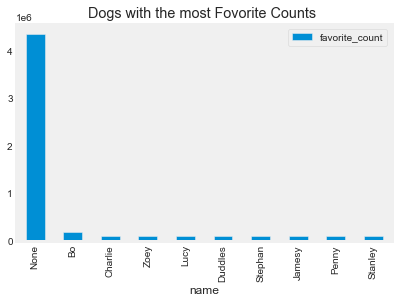

In [69]:
data.groupby('name')[['favorite_count']].sum().sort_values(by='favorite_count',ascending=False)[:10].plot.bar()\
.set_title('Dogs with the most Fovorite Counts ')
plt.grid(False);


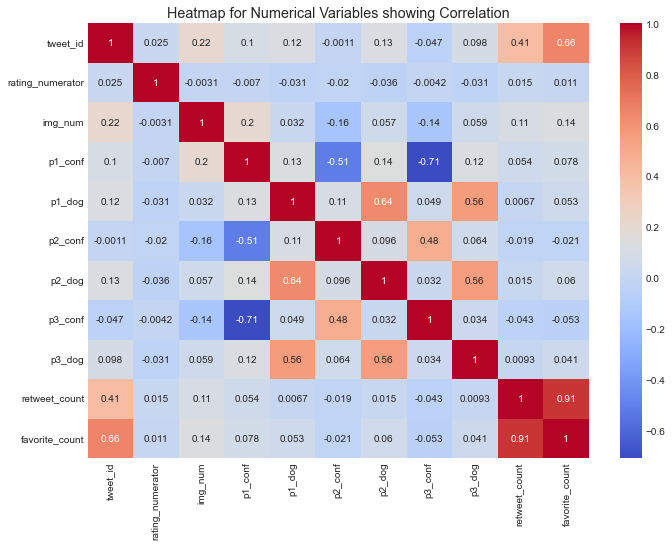

In [70]:
#plotting a seaborn to show the relationship between the numerical variable s
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='coolwarm', annot=True).set_title('Heatmap for Numerical Variables showing Correlation');

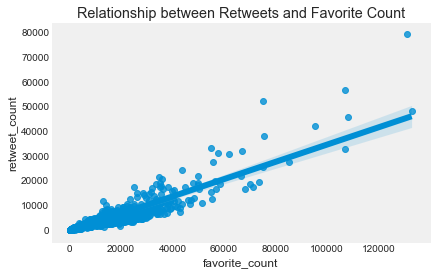

In [71]:
ax = sns.regplot(x="favorite_count", y="retweet_count", data=data)
plt.title('Relationship between Retweets and Favorite Count')
plt.grid(False)

There is a strong positive correlation between Retweet and favorite counts. As number of likes increases, so as retweets 

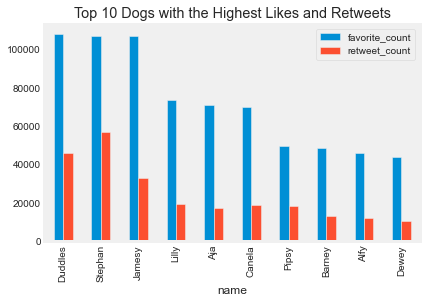

In [72]:
data.groupby('name')[['favorite_count', 'retweet_count']].mean().\
sort_values(by='favorite_count',ascending=False)[:10].plot.bar().set_title('Top 10 Dogs with the Highest Likes and Retweets')
plt.grid(False)

plt.show()

In terms of Fovorite likes, Duddies and Jamesy has been leading. On the other hand, dogs that are mostly retweeted are Stephen

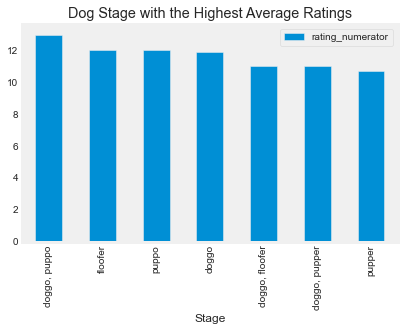

In [73]:
#top rated dog stage 
data.groupby('Stage')[['rating_numerator']].mean().\
sort_values(by='rating_numerator',ascending=False)[:10].plot.bar().set_title('Dog Stage with the Highest Average Ratings');
plt.grid(False)
plt.show()

Puppo recorded the highest average rating. Followed by Floofer, doggo and pupper

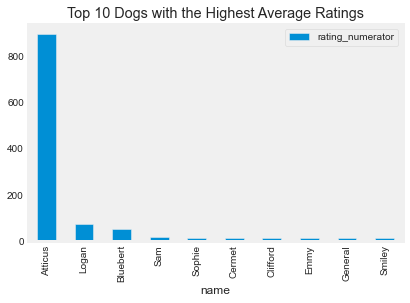

In [74]:
data.groupby('name')[['rating_numerator']].mean().\
sort_values(by='rating_numerator',ascending=False)[:10].plot.bar().set_title('Top 10 Dogs with the Highest Average Ratings')
plt.grid(False)
plt.show()


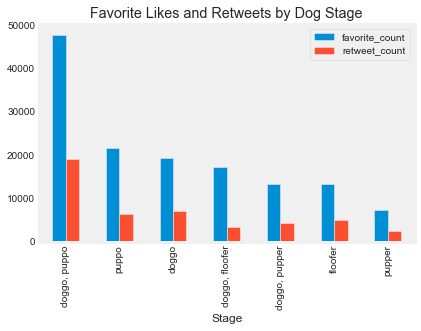

In [75]:
#dogs stage with the higher numver of tweeets and retweets 
data.groupby('Stage')[['favorite_count','retweet_count']].mean().sort_values(by='favorite_count',ascending=False).plot.bar()\
.set_title('Favorite Likes and Retweets by Dog Stage')
plt.grid(False);

On average, Puppo receives the higher number of tweets. In terms of retweets, both puppo and duggo tops the chart. Pupper has been recording the least likes and retweets 